Generate Synthetic Network for OD Estimation Problem

- Simple network with e.g. 3 junction at each an off-ramp and an on-ramp
- Network edge features: length and speed limit
- All road uni-directional in simple toy example - we can extend this later to more complex case of bi-directional roads
- Distinction between fast (main) roads and slow (off/on ramps, minor roads) - this may be more important when route choice introduced
- Output the path incidence matrix and assignment matrix assuming no route choice beyond shortest path
- Generate an OD matrix for the system - e.g. randomly or through some distribution function
- Translate OD matrix to
    - Actual edge level flow
    - INRIX like flow - give x% sample of vehicles in OD matrix a tracker and record their flow
    - MIDAS - record all vehicles at certain points on the network

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

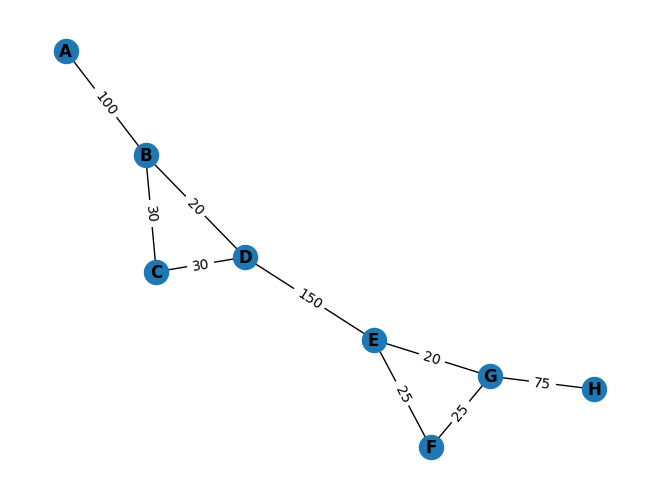

In [19]:
# Create network with 3 junctions

# Create an empty graph
G = nx.Graph()

# Add nodes
nodes = ['A','B','C','D','E','F','G','H']
G.add_nodes_from(nodes)

fast_road_sl = 60
slow_road_sl = 30

# Add Edges
edges = [
    #Main road edges
    ('A','B',{'length': 100, 'speed limit': fast_road_sl}),
    ('B','D',{'length': 20, 'speed limit': fast_road_sl}),
    ('D','E',{'length': 150, 'speed limit': fast_road_sl}),
    ('E','G',{'length': 20, 'speed limit': fast_road_sl}),
    ('G','H',{'length': 75, 'speed limit': fast_road_sl}),
    
    #Slow on/off ramps
    ('B','C',{'length': 30, 'speed limit': slow_road_sl}),
    ('C','D',{'length': 30, 'speed limit': slow_road_sl}),
    ('E','F',{'length': 25, 'speed limit': slow_road_sl}),
    ('F','G',{'length': 25, 'speed limit': slow_road_sl})
]

G.add_edges_from(edges)

#Visualise Network

pos = nx.spring_layout(G)  # positions for all nodes

nx.draw(G, pos, with_labels=True, font_weight='bold')

# Edge labels
edge_labels = nx.get_edge_attributes(G, 'length')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show

In [25]:
# Get all pairs shortest paths

all_pairs_shortest_paths = {}

for u in list(G.nodes):
    all_pairs_shortest_paths[u] = {}
    for v in list(G.nodes):
        if u != v:
            all_pairs_shortest_paths[u][v] = nx.shortest_path(G,u,v,weight = 'length')

In [20]:
# Get path incidence and assignment matrix